In [1]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from logistic_classification import LogisticClassification
import numpy as np
from collections import Counter
import numpy as np
import pandas as pd
import utils.remove_cols as remove_cols

# IMPORTIEREN

In [2]:
df = pd.read_csv("immoscout_cleaned_lat_lon_fixed_v7.csv")

/var/folders/mw/x398f5s545bffd989r6xpm100000gp/T/ipykernel_62801/2143901549.py:1: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("immoscout_cleaned_lat_lon_fixed_v7.csv")


# BEREINIGEN / IMPUTIEREN

# TRANSFORMIEREN

In [3]:
# create dictionary with object-type information
types_nrs = dict(enumerate(df["type"].unique()))
types_name = {v: k for k, v in types_nrs.items()}
# change object-type to numeric value
df["type"] = df["type"].map(types_name)

# keep only cols with type int or float
df = df.select_dtypes(include=["int64", "float64"])
# remove specific columns
df_remove = pd.read_excel("fixtures/remove_cols.xlsx")
df_remove = remove_cols.remove_chars_space(df_remove, "feature")
dct = remove_cols.get_dct_from_df(df_remove)
assert len(dct) == len(df.columns)
df = df[[k for k, v in dct.items() if v == 1]]

# test
assert len(df.columns) == 30
assert df.values.shape[0] != 0

# MODEL (PREPARE DATA)

In [4]:
# drop nan because the model can't handle them
df = df.dropna() # 1016 / 13378 = 7.6% of data is lost
# make Matrix y as target with column type
y = df["type"].values[:, np.newaxis]
# make Matrix X as features with all columns except type
X = df.drop(["type"], axis=1).values
assert type(y) == np.ndarray
assert type(X) == np.ndarray
# standardize X
X = (X - X.mean(axis=0)) / X.std(axis=0)
# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# MODEL (PREPARE MODEL)

In [5]:
# create 20 models and store them in a list
models = [LogisticClassification(lr=0.01, n_iters=2000) for _ in range(21)]
# create a dictionary with the models as keys and the predictions as values
models_pred = dict.fromkeys(range(0, 21), 0)
# create a dictionary with the models as keys and the accuracy as values
models_accuracies = dict.fromkeys(range(0, 21), 0)
print(" models := {}\n models_pred := {}\n accuracy_dict := {}\n".format(type(models[0]), type(models_pred), type(models_accuracies)))

 models := <class 'logistic_classification.LogisticClassification'>
 models_pred := <class 'dict'>
 accuracy_dict := <class 'dict'>



In [6]:
# fit one model and see what the accuracy is
models[0].fit(X_train, np.where(y_train == 0, 1, 0))
# predict one model
y_pred = models[0].predict(X_test)
# calculate accuracy
accuracy = accuracy_score(np.where(y_test == 0, 1, 0), y_pred)
print("Accuracy: {}".format(accuracy))

Accuracy: 0.504650222401941


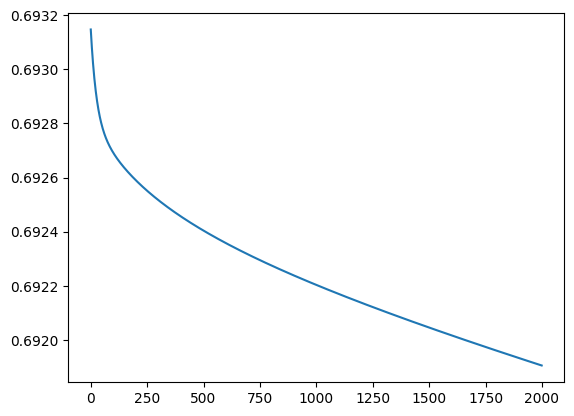

In [7]:
# plost cost_hist
plt.plot(models[0].cost_hist)

\begin{align}
\hat{y} & = \sigma(Xw + b) \\ \\
\ L(\hat{y}, y) & =  -y * \ln({\hat{y}}) + (1-y) * \ln({1 - \hat{y}}) \\ \\
\ C(\theta) & = \frac{1}{N} * \sum_{i=1}^N L \left( \hat{y} (x^{(i)}, \theta), y^{(i)} \right) \\ \\
\ \nabla C & = (\frac{\partial C}{\partial w}, \frac{\partial C}{\partial b})^T \\ \\
\frac{\partial C}{\partial w} & = X^T \left(\frac{\partial C}{\partial L} * \hat{y} * (1 - \hat{y}) \right) * \frac{1}{N} \\ \\
\frac{\partial C}{\partial b} & = \frac{1}{N} * \sum_{\hat{y}} \left(\frac{\partial C}{\partial L} * \hat{y} * (1 - \hat{y}) \right)
\end{align}